# Market_Basket_Analysis_in_Python_using_apriori_Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\Shreya Jadhav\AppData\Local\Temp\ipykernel_15020\3983532214.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df["Date"])


In [6]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


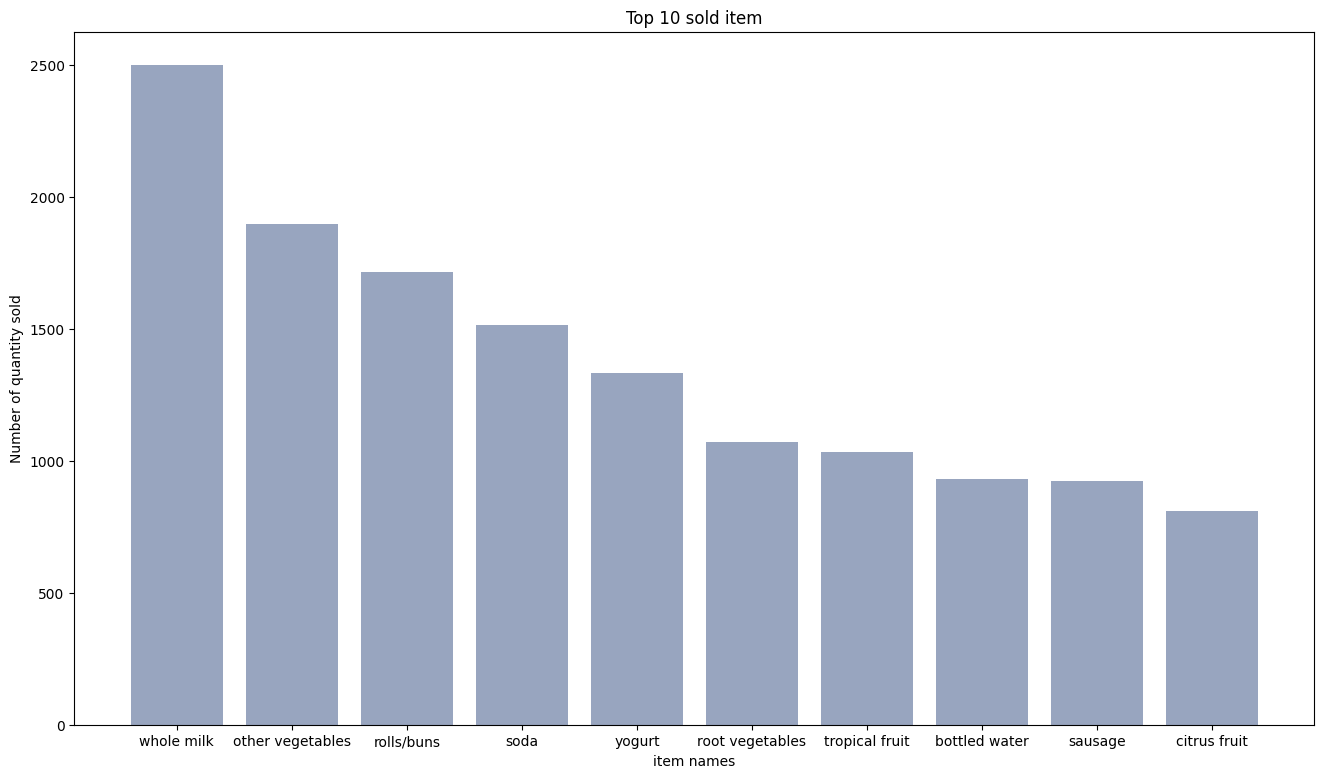

In [7]:
Item_distr = df.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency', ascending = False).head(10)
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color=(0.2, 0.3, 0.5, 0.5))
plt.title("Top 10 sold item")
plt.xlabel("item names")
plt.ylabel("Number of quantity sold")
plt.xticks(x_pos, bars)
plt.show()

In [8]:
x = df.set_index(['Date'])
x

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold')]

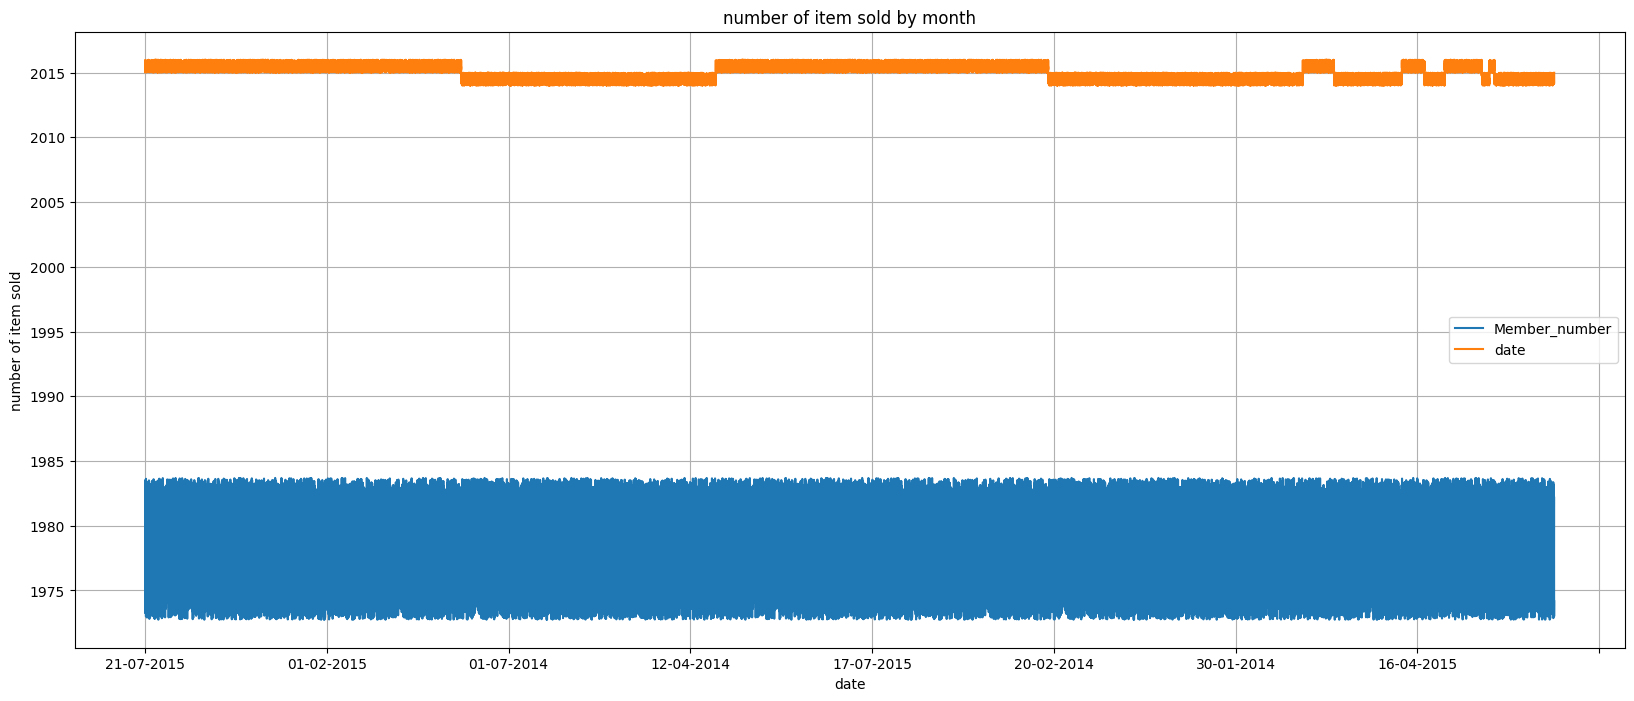

In [9]:
x.plot(figsize = (20,8), grid = True, title = 'number of item sold by month').set(xlabel="date", ylabel= "number of item sold")

In [10]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by="Member_number", ascending = False)
cust_level["itemDescription"]= cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [11]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [12]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift =3, min_length = 2)

In [13]:
results = list(rules)

In [14]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [15]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs, supports, confidences, lifts))
resultsindataframe = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidences', 'Lifts'])


In [16]:
resultsindataframe.nlargest(n=10, columns= "Lifts")

,Left Hand Side,Right Hand Side,Support,Confidences,Lifts
4915,bottled water,pip fruit,0.002052,0.105263,14.654135
4914,bottled water,whole milk,0.002052,0.105263,12.068111
2674,beef,other vegetables,0.002052,0.242424,11.524021
3573,brown bread,specialty chocolate,0.002052,0.073394,11.443670
4133,citrus fruit,whole milk,0.002052,0.148148,11.105413
3290,bottled water,citrus fruit,0.002052,0.150943,10.322410
2904,brown bread,misc. beverages,0.002309,0.097826,9.533152
5045,bottled water,whole milk,0.002052,0.135593,9.438257
2902,brown bread,domestic eggs,0.002052,0.086957,9.415459
2734,bottled water,brown bread,0.002309,0.118421,9.232105
